In [1]:
#JDRO
import tensorflow as tf




In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)



In [3]:
celsius_q = np.array([-40, -10,  0,  8, 15, 22,  38,  66,  34], dtype = float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100,  150.8,  93.2],  dtype=float)



In [4]:
for i,c in enumerate(celsius_q):
  print("{} Degree Celcius = {} Degree Farenheit".format(c, fahrenheit_a[i]))

-40.0 Degree Celcius = -40.0 Degree Farenheit
-10.0 Degree Celcius = 14.0 Degree Farenheit
0.0 Degree Celcius = 32.0 Degree Farenheit
8.0 Degree Celcius = 46.0 Degree Farenheit
15.0 Degree Celcius = 59.0 Degree Farenheit
22.0 Degree Celcius = 72.0 Degree Farenheit
38.0 Degree Celcius = 100.0 Degree Farenheit
66.0 Degree Celcius = 150.8 Degree Farenheit
34.0 Degree Celcius = 93.2 Degree Farenheit


In [5]:
l0 = tf.keras.layers.Dense(units = 1, input_shape=[1])
model = tf.keras.Sequential([l0])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-02 20:04:07.974484: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-12-02 20:04:07.974617: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-12-02 20:04:07.974652: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-12-02 20:04:07.974946: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-02 20:04:07.975006: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow d

In [6]:
model.compile(loss="mean_squared_error", optimizer = tf.keras.optimizers.Adam(0.1))
#ForwardPass, BackPass, pesos y bias (actualizan)
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose=False)
print("Finished training the model")



2025-12-02 20:04:10.358904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Finished training the model


In [7]:
print(model.predict(np.array([100.0])))
print("These are the layer variables: {}".format(l0.get_weights()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[214.97299]]
These are the layer variables: [array([[1.8989942]], dtype=float32), array([25.07357], dtype=float32)]


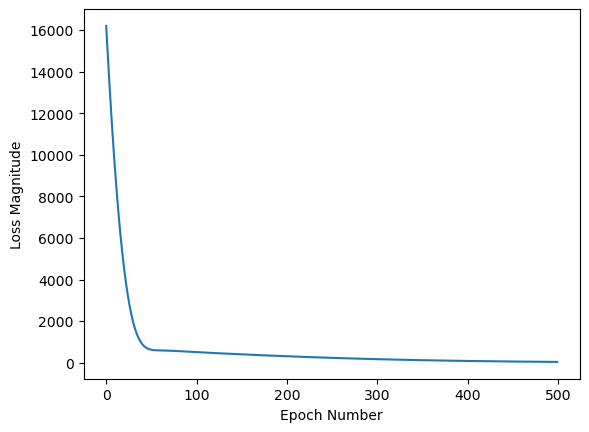

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
